<a href="https://colab.research.google.com/github/JoshFCooper415/JoshFCooper415/blob/main/ASL_PartialVGGipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
import os
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense
from tensorflow.keras.layers import AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.layers import ReLU, concatenate, Rescaling
import tensorflow.keras.backend as K
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [7]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [13]:
! cp kaggle.json ~/.kaggle/

In [14]:
! chmod 600 ~/.kaggle/kaggle.json

In [15]:
! kaggle d download grassknoted/asl-alphabet

 99% 1.02G/1.03G [00:28<00:00, 42.3MB/s]
100% 1.03G/1.03G [00:28<00:00, 38.6MB/s]


In [ ]:
! unzip asl-alphabet.zip

In [2]:
batch_size=700
img_height=64
img_width=64

#base_dir = os.path.join(os.getcwd(), "asl-alphabet")
train_dir = os.path.join( 'asl_alphabet_train/asl_alphabet_train')
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 87000 files belonging to 29 classes.
Using 78300 files for training.


In [3]:
validation_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.09,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 87000 files belonging to 29 classes.
Using 7830 files for validation.


In [4]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.01,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 87000 files belonging to 29 classes.
Using 870 files for validation.


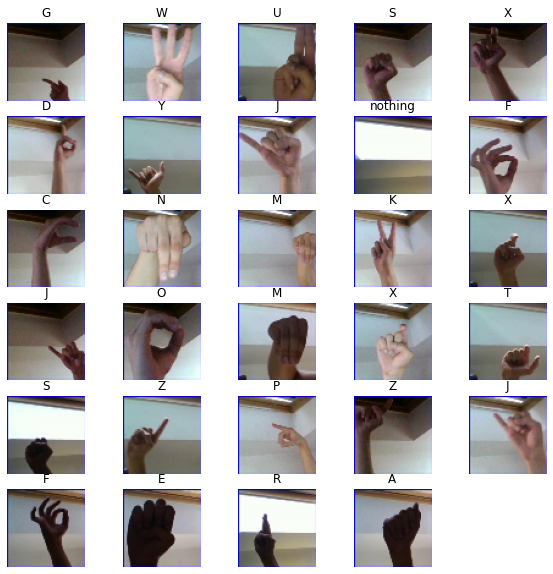

In [8]:
import matplotlib.pyplot as plt
input_shape=(64, 64, 3)
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(len(class_names)):
        ax = plt.subplot(6,5 , i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [17]:
with tf.device('/device:GPU:0'):
  input = Input(shape =(64,64, 3))
  #block 1
  x = Conv2D (filters =64, kernel_size =3, padding ='same', activation='relu')(input)
  x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
  x = Dropout(.25)(x)
  #block 2
  x = Conv2D (filters =128, kernel_size =3, padding ='same', activation='relu')(x)
  x = MaxPool2D(pool_size =2, strides =2, padding ='same')(x)
  x = Dropout(.25)(x)
  #fully connected layers
  x = Flatten()(x)
  x = Dense(units = 4096, activation ='relu')(x)
  x = Dropout(.5)(x) 
  output = Dense(units = 29, activation ='softmax')(x)
        
  model = Model (inputs=input, outputs =output)
  model.summary()
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                       

In [18]:
model.fit(train_ds, epochs=15, batch_size=2000)
model.evaluate(test_ds, verbose=2)

Epoch 1/15
112/112 [==============================] - 65s 560ms/step - loss: 76.5957 - accuracy: 0.0377
Epoch 2/15
112/112 [==============================] - 47s 399ms/step - loss: 2.9587 - accuracy: 0.1658
Epoch 3/15
112/112 [==============================] - 47s 400ms/step - loss: 2.0892 - accuracy: 0.3905
Epoch 4/15
112/112 [==============================] - 52s 442ms/step - loss: 1.4573 - accuracy: 0.5541
Epoch 5/15
112/112 [==============================] - 63s 540ms/step - loss: 1.0853 - accuracy: 0.6603
Epoch 6/15
112/112 [==============================] - 61s 521ms/step - loss: 0.8556 - accuracy: 0.7280
Epoch 7/15
112/112 [==============================] - 61s 521ms/step - loss: 0.7124 - accuracy: 0.7718
Epoch 8/15
112/112 [==============================] - 63s 542ms/step - loss: 0.6079 - accuracy: 0.8035
Epoch 9/15
112/112 [==============================] - 52s 440ms/step - loss: 0.5567 - accuracy: 0.8212
Epoch 10/15
112/112 [==============================] - 55s 475ms/step - 

[0.09316344559192657, 0.977011501789093]